# 1. Importing the Dependencies

In [1]:
!pip install imbalanced-learn

In [2]:
import sys
!{sys.executable} -m pip install imbalanced-learn

In [3]:
import sys
!{sys.executable} -m pip install xgboost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# 2. Data Loading and Understanding

In [5]:
import os

path = "/Users/manojmandava/Downloads/Github Projects/Telco Customer Churn"
print(os.listdir(path))

['.DS_Store', 'data:telco_churn.csv']


In [6]:
#load teh csv data to a pandas dataframe 
df = pd.read_csv("/Users/manojmandava/Downloads/Github Projects/Telco Customer Churn/data:telco_churn.csv")


In [7]:
df.shape

(7043, 21)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
pd.set_option("display.max_columns", None)

In [10]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#droping customerID coloumn as this is not required for modelling
df = df.drop(columns=["customerID"])

In [13]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
print(df["gender"].unique())

['Female' 'Male']


In [16]:
print(df["SeniorCitizen"].unique())

[0 1]


In [17]:
#printing the unique values in all the coloumns 

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [18]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df[df["TotalCharges"] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
len(df[df["TotalCharges"]==" "])

11

In [21]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [22]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
# checking the class distribution of target column 
print(df["Churn"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modeling  
2. No missing values in the dataset  
3. Missing values in the TotalCharges column were replaced with 0  
4. Class imbalance identified in the target

# 3.Exploratory Data Analysis (EDA)

In [25]:
df.shape

(7043, 20)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features - Analysis 

Understanding the distribution of teh numerical features

In [29]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5,3))
    
    # Use correct spelling: 'column_name'
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # Calculate the mean and median values for the column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    # Add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="-", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")
    
    plt.legend()
    plt.show()


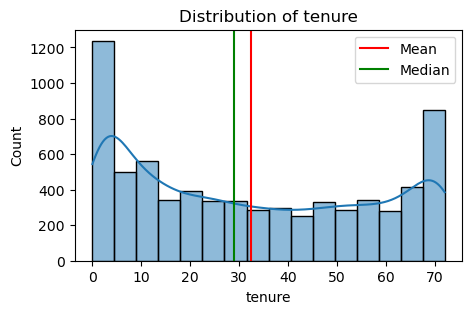

In [30]:
plot_histogram(df, "tenure")

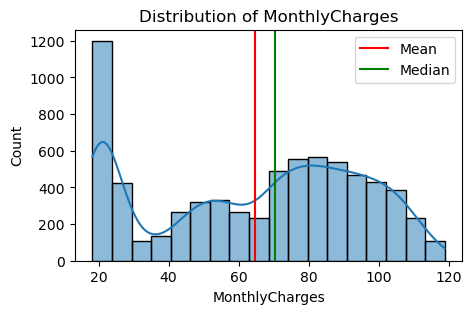

In [31]:
plot_histogram(df, "MonthlyCharges")

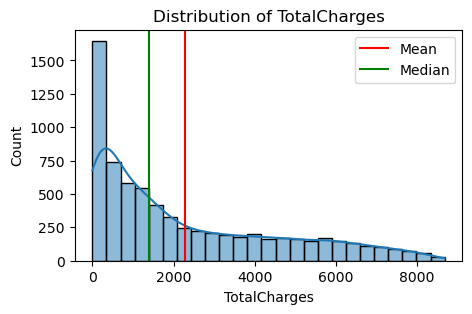

In [32]:
plot_histogram(df, "TotalCharges")

Box plot for numerical features 

In [33]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

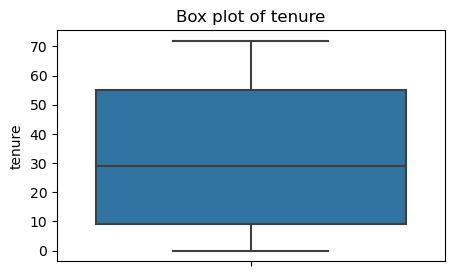

In [34]:
plot_boxplot(df, "tenure")

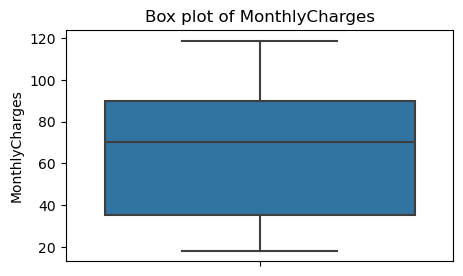

In [35]:
plot_boxplot(df, "MonthlyCharges")

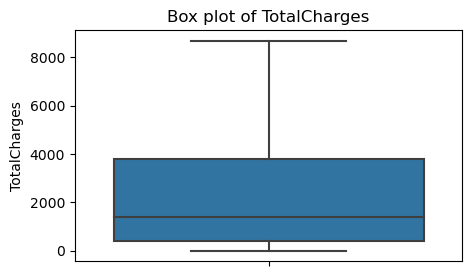

In [36]:
plot_boxplot(df, "TotalCharges")

### Correlation Heatmap for numerical columns 

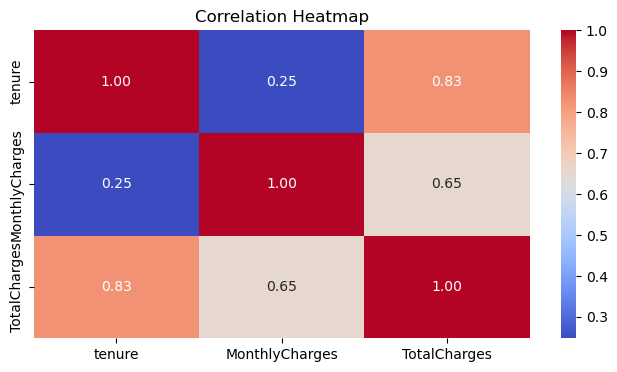

In [37]:
# Correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Countplot for categorical coloumns

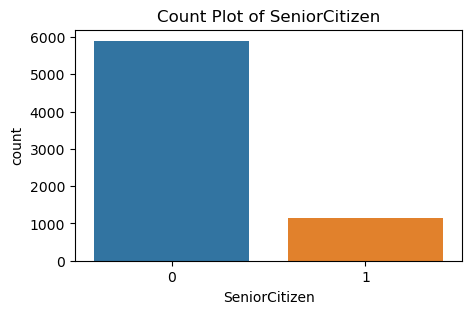

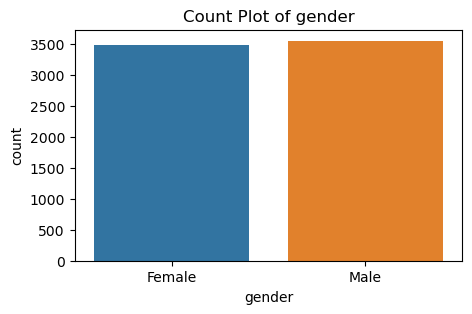

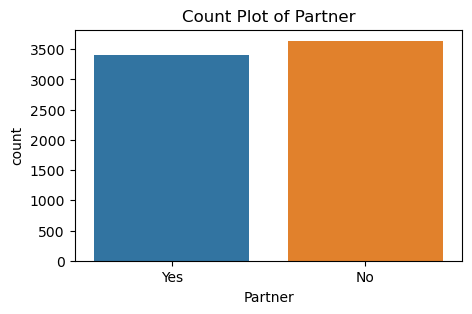

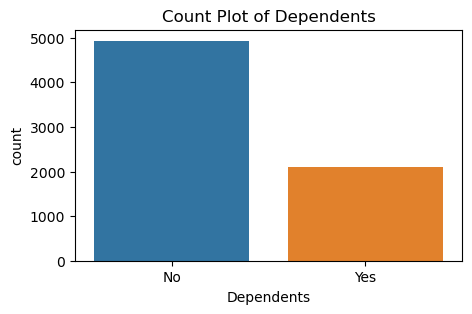

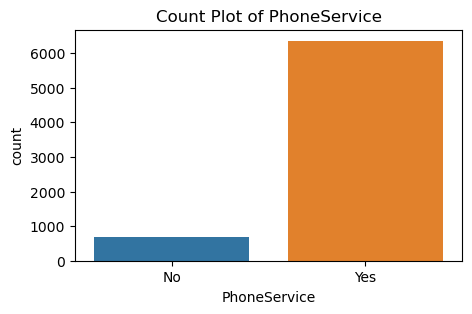

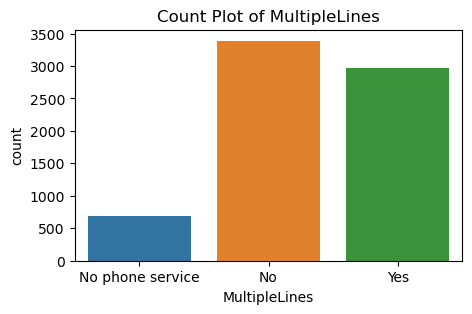

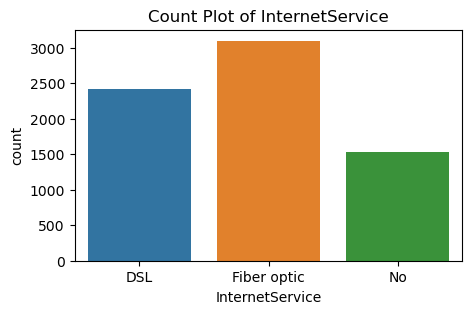

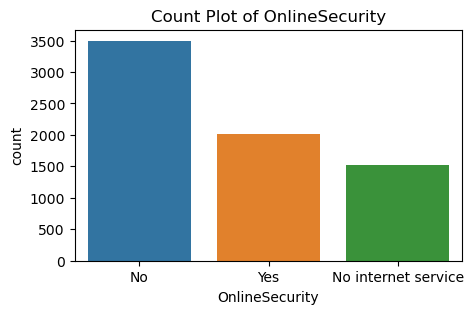

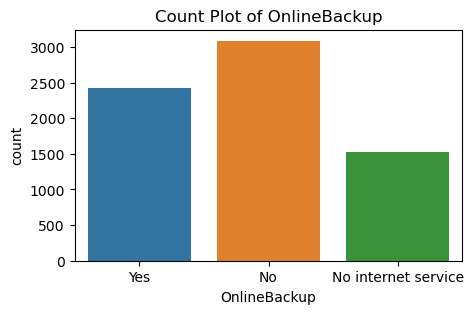

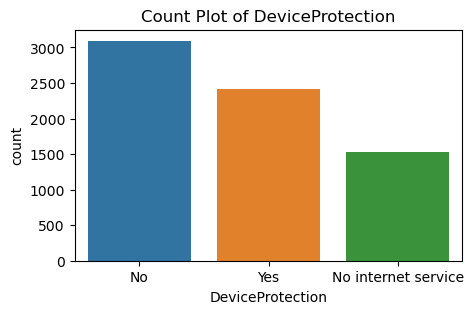

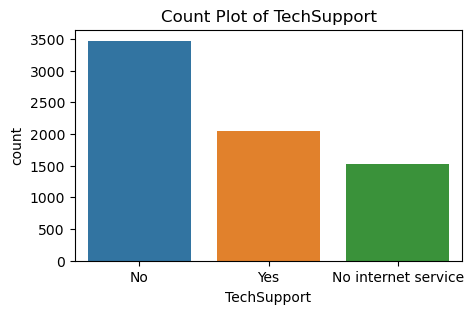

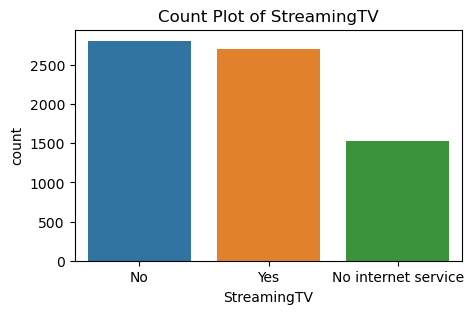

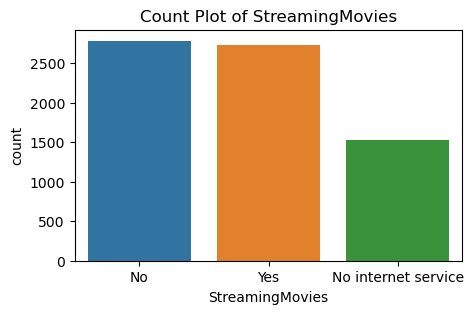

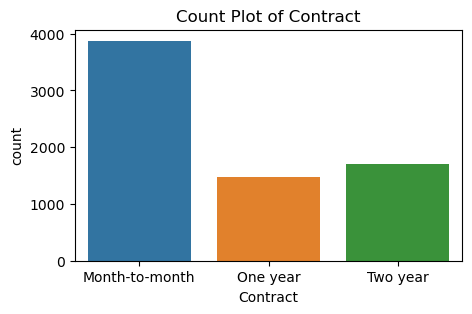

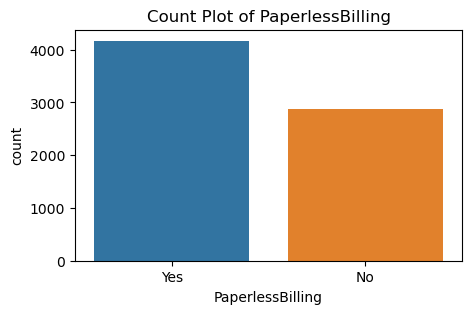

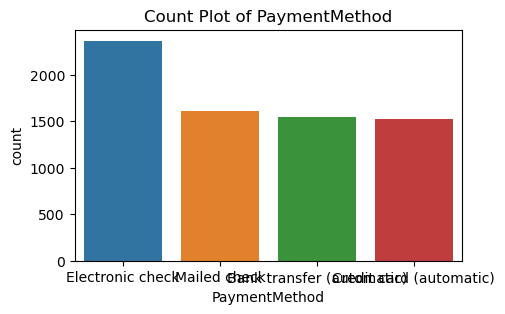

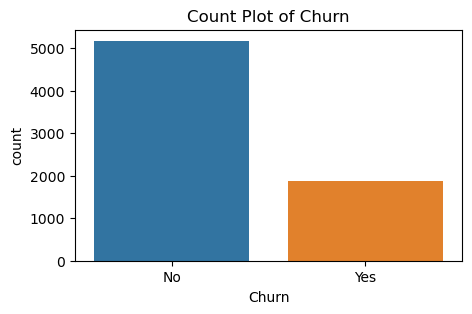

In [40]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

# 4.Data Preprocessing 

In [41]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label encoding of target column

In [42]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [43]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [44]:
print(df["Churn"].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


### Lable encoding of categorical features

In [45]:
# identifing columns with object data type

object_columns = df.select_dtypes(include="object").columns

In [46]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [47]:
# initialize a dictionary to save the encoders

encoders = {}

# apply label encoding and store the encoders 

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    
# save the encoders to a pickle file 

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [48]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Training and Test Data Split

In [50]:
# Splitting the features and target

x = df.drop(columns=["Churn"])
y = df["Churn"]

In [51]:
# Split training and test data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [52]:
print(y_train.shape)

(5634,)


In [53]:
print(y_train.value_counts())

0    4118
1    1516
Name: Churn, dtype: int64


In [54]:
smote = SMOTE(random_state=45)

In [55]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [56]:
print(y_train_smote.shape)

(8236,)


In [57]:
print(y_train_smote.value_counts())

0    4118
1    4118
Name: Churn, dtype: int64


In [58]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

print("Original:", y_train.value_counts())
print("SMOTE:", y_train_smote.value_counts())
print("RUS:", y_train_rus.value_counts())

Original: 0    4118
1    1516
Name: Churn, dtype: int64
SMOTE: 0    4118
1    4118
Name: Churn, dtype: int64
RUS: 0    1516
1    1516
Name: Churn, dtype: int64


# 5.Model Training

### Hyperparameters tuning 

In [59]:
#Random Forest with GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

rf = RandomForestClassifier(random_state=45)

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                       cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

rf_grid.fit(x_train_smote, y_train_smote)

best_rf = rf_grid.best_estimator_
print("Best Random Forest Params:", rf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Params: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [60]:
# XGBoost with GridSearchCV

from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=45,eval_metric='logloss')

xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                        cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

xgb_grid.fit(x_train_smote, y_train_smote)

best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Params:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred_rf = best_rf.predict(x_test)
y_pred_xgb = best_xgb.predict(x_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Random Forest Accuracy: 0.8005677785663591
[[897 159]
 [122 231]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1056
           1       0.59      0.65      0.62       353

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.81      0.80      0.80      1409

XGBoost Accuracy: 0.7920511000709723
[[888 168]
 [125 228]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1056
           1       0.58      0.65      0.61       353

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.79      0.80      1409



## Voting Classifier: Combining RF and XGBoost

In [80]:
# Voting Classifier: Combine Best RF and XGB
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
], voting='soft')

voting_model.fit(x_train_smote, y_train_smote)

# Predict and evaluate
y_pred_voting = voting_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7998580553584103
[[897 159]
 [123 230]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1056
           1       0.59      0.65      0.62       353

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.81      0.80      0.80      1409



In [62]:
rf_rus = RandomForestClassifier(random_state=45)
rf_rus.fit(x_train_rus, y_train_rus)

y_pred_rus = rf_rus.predict(x_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1056
           1       0.50      0.77      0.61       353

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.75      0.77      1409



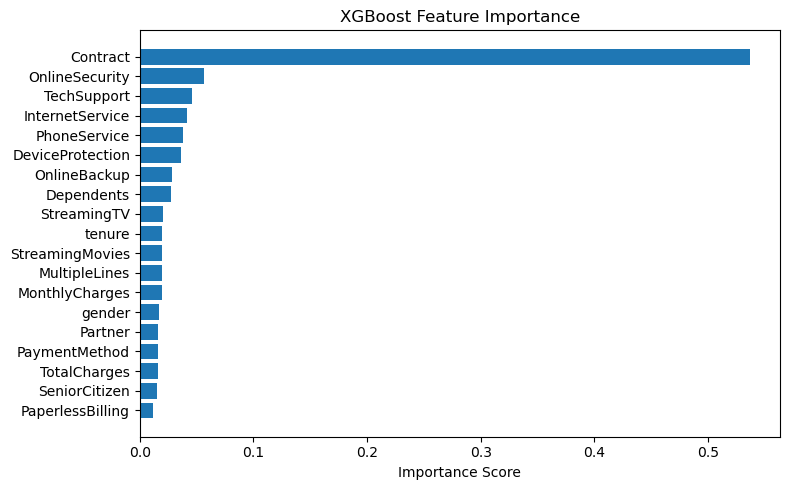

In [78]:
# XGBoost Feature Importance
import matplotlib.pyplot as plt

importances = best_xgb.feature_importances_
features = x_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 5))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

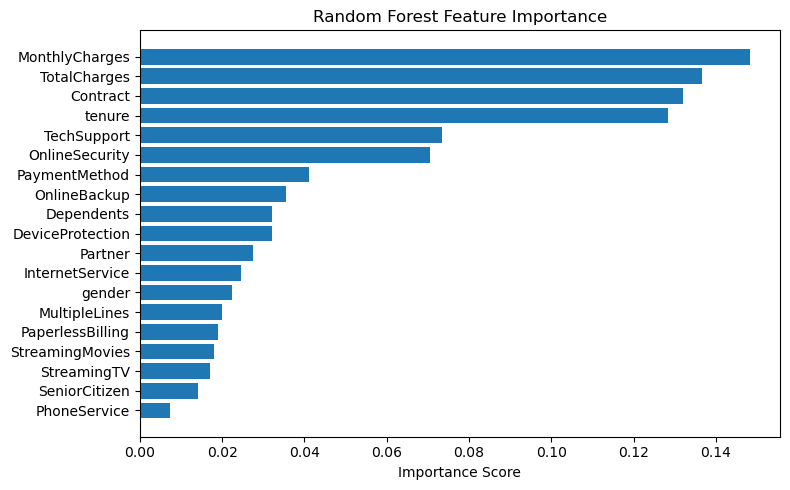

In [79]:
# Random Forest Feature Importance
importances_rf = best_rf.feature_importances_
sorted_idx_rf = importances_rf.argsort()

plt.figure(figsize=(8, 5))
plt.barh(features[sorted_idx_rf], importances_rf[sorted_idx_rf])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Training with default hyperparameters

In [63]:
# dictionary of models 

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=45),
    "Random Forest": RandomForestClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=45)
}

In [64]:
# dictionary to store the cross validation results

cv_scores ={}

# perform 5-ford cross validation for each model

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring= "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [65]:
cv_scores

{'Decision Tree': array([0.67718447, 0.7346691 , 0.83788707, 0.83788707, 0.83849423]),
 'Random Forest': array([0.71966019, 0.76988464, 0.90467517, 0.89253188, 0.89860352]),
 'XGBoost': array([0.69963592, 0.74195507, 0.904068  , 0.89313904, 0.90042502])}

### Stratified K-fold CV

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=45),
    "Random Forest": RandomForestClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=45, eval_metric='logloss')
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scorer = make_scorer(accuracy_score)

def evaluate_models_cv(models, X, y, cv, scorer):
    results = {}

    for name, model in models.items():
        print(f"Training: {name}")
        scores = cross_val_score(model, X, y, cv=cv, scoring=scorer, n_jobs=-1)
        results[name] = scores
        print(f"Fold Accuracies: {np.round(scores, 3)}")
        print(f"Mean Accuracy: {np.mean(scores):.4f}")
        print("-" * 60)
    
    return results

cv_results = evaluate_models_cv(models, x_train_smote, y_train_smote, skf, scorer)

🔍 Training: Decision Tree
Fold Accuracies: [0.772 0.787 0.784 0.786 0.796]
Mean Accuracy: 0.7852
------------------------------------------------------------
🔍 Training: Random Forest
Fold Accuracies: [0.848 0.847 0.846 0.848 0.847]
Mean Accuracy: 0.8471
------------------------------------------------------------
🔍 Training: XGBoost
Fold Accuracies: [0.839 0.834 0.838 0.848 0.83 ]
Mean Accuracy: 0.8379
------------------------------------------------------------


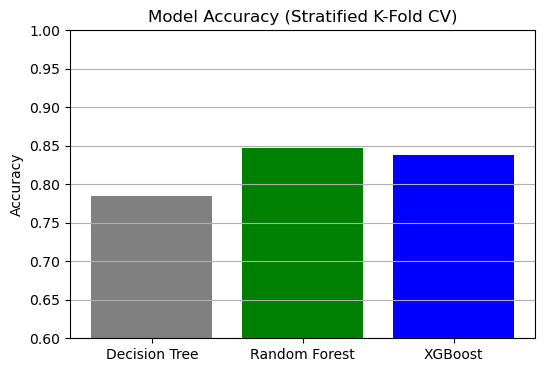

In [67]:
mean_scores = {model: np.mean(scores) for model, scores in cv_results.items()}

plt.figure(figsize=(6, 4))
plt.bar(mean_scores.keys(), mean_scores.values(), color=["gray", "green", "blue"])
plt.title("Model Accuracy (Stratified K-Fold CV)")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.grid(axis='y')
plt.show()

### Random Forest gives the highest accuracy compared to other models with default parameters

In [68]:
rfc = RandomForestClassifier(random_state=45)

In [69]:
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=45)

In [70]:
print(y_test.value_counts())

0    1056
1     353
Name: Churn, dtype: int64


# 6.Model Evaluation

In [71]:
#evaluate on test data 
y_test_pred = rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confussion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7955997161107168
Confussion Matrix:
 [[902 154]
 [134 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1056
           1       0.59      0.62      0.60       353

    accuracy                           0.80      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [72]:
x.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [73]:
# Save the trained model as a pickle file
model_data = {"model": rfc, "features_names": x.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

# 7.Load the saved model and build a Predictive System

In [74]:
#load the saved model and the feature names 

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)
    
    loaded_model = model_data["model"]
    feature_names = model_data["features_names"]

In [75]:
print(loaded_model)

RandomForestClassifier(random_state=45)


In [76]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [77]:
import pickle
import pandas as pd

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

input_data_df = pd.DataFrame([input_data])

# Encode categorical features
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# Reorder columns to match training order
input_data_df = input_data_df[feature_names]

# Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Probability of Churn: {pred_prob[0][1]*100:.2f}%")

Prediction: No Churn
Probability of Churn: 32.00%


### Final Summary

- **Best Model**: Voting Classifier (Random Forest + XGBoost)
- **Accuracy**: ~80.2%
- **Class Imbalance Strategy**: SMOTE provided slightly better recall and F1-score than Random Undersampling
- **Feature Importance**: Tenure, MonthlyCharges, and Contract were top drivers of churn
- **Evaluation Metrics Used**: Accuracy, F1-Score, Confusion Matrix, ROC-AUC       
- **Deployment Ready**: Model saved with `pickle`, encoders stored, and reusable prediction pipeline created
